# CBOE VIX 지수 분석

![](https://camo.githubusercontent.com/6243b83a24728bdb058df5d4c730329f69f28a321e2cc1de7551b56192bc9ffa/68747470733a2f2f692e696d6775722e636f6d2f357a704e5264472e706e67)

[Finance Data Reader](https://github.com/FinanceData/FinanceDataReader) 라이브러리를 사용하여 FRED로부터 대표적인 경기 선행 지수 데이터를 가져와 현재 경기의 흐름을 확인합니다.

VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것입니다. 시카고 옵션거래소(CBOE)에서 제공하고 있어 **CBOE VIX**라고 표기하기도 합니다.

주식시장의 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하게 되어 옵션의 가격(프리미엄)이 높아집니다. 즉, VIX 지수가 오르게 됩니다. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미합니다. 이 때문에 VIX를 **'공포지수'**라고도 부르기도 합니다.

VIX는 단기적으로 증권 시장의 지수(예를 들어, S&P 500 지수)와 반대로 움직이는 특징이 있습니다.

VIX가 30(%)이라고 하면 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미합니다. 보통 VIX는 보통 30을 기준으로 30보다 높으면 변동성이 높다고 하고, 20 이하면 변동성이 낮다고 합니다.

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## VIX 가격 데이터

우선 VIX 지수를 확인하겠습니다.

In [3]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '1990-01-01', '2022-01-01') # S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-12-27,17.68,19.37,19.41,17.55,0.0,-0.0156
2021-12-28,17.54,17.78,18.47,17.51,0.0,-0.0079
2021-12-29,16.95,17.63,18.00,16.71,0.0,-0.0336
2021-12-30,17.33,17.30,17.79,16.62,0.0,0.0224
2021-12-31,17.22,17.63,18.27,16.99,0.0,-0.0063


Text(2021-12-31, 17.22, 'Current : 17.22')

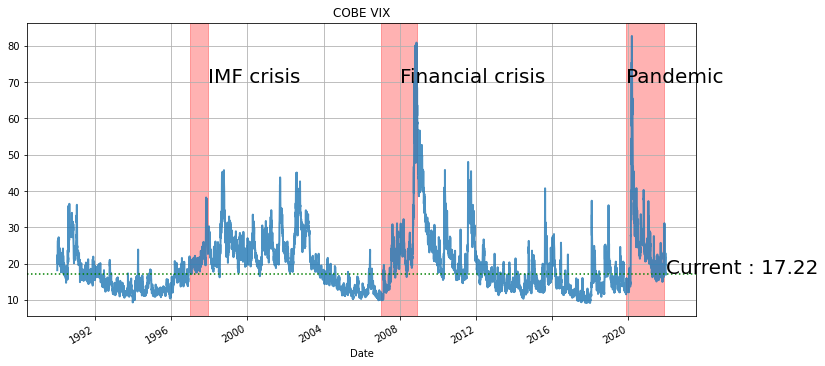

In [4]:
#@vix index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기
ax.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
ax.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
ax.axvspan('2019-12', '2021-12', alpha=0.3, color='red') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

# 2020-03-09 VIX 4.46
ax.axhline(17.22, ls=':', c='g') # 17.22 (2020-03-09 VIX)
ax.annotate('Current : 17.22', xy=('2021-12-31', 17.22), fontsize=20)

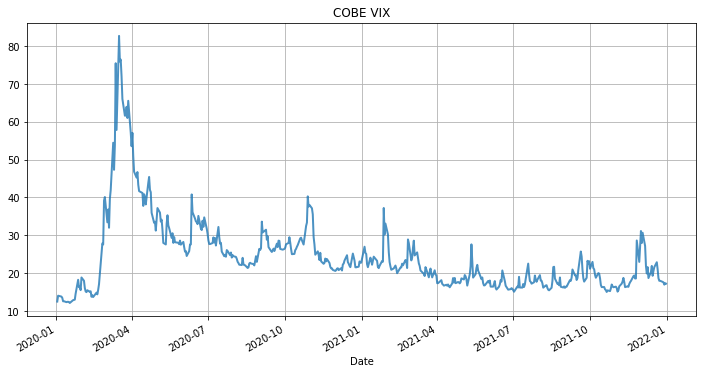

In [5]:
ax = vix['2020-01-01':'2021-12-31']['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

2020년 상반기에 급격하게 높아졌던 VIX 지수는 2020년 하반기부터 안정화된 것으로 보입니다.

2020-2021년에는 10-15선에서 급등과 급락을 반복하고 있습니다.

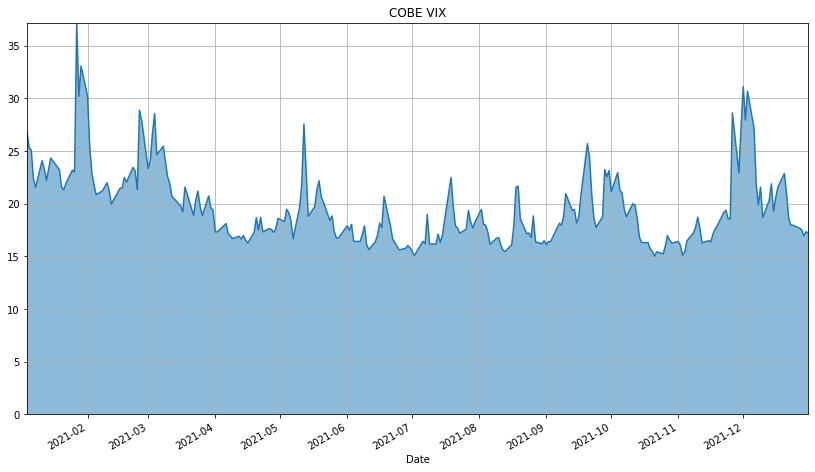

In [6]:
values = vix['2021-01-01':'2021-12-31']['Close']

ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX')
ax.fill_between(values.index, 0, values, alpha=0.5)
ax.margins(0)

## VIX지수, S&P 500 지수, NASDAQ 지수 데이터

In [7]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '2010-01-01', '2021-12-31') # S&P 500 VIX
nasdaq = fdr.DataReader('NASDAQCOM', data_source='fred') # NASDAQ index
sp500 = fdr.DataReader('US500', '2010-01-01', '2021-12-31') # S&P 500 index

In [8]:
import pandas as pd

df = pd.concat([vix['Close'], nasdaq['2010':], sp500['Close']], axis=1)
df.columns = ['VIX', 'NASDAQCOM', 'S&P500']

In [9]:
df = df.dropna(axis=0)

# S&P500지수와 VIX 지수

S&P500 지수와 VIX 지수는 앞에서 말했듯이 반대로 움직이는 것을 확인할 수 있습니다.

<AxesSubplot:>

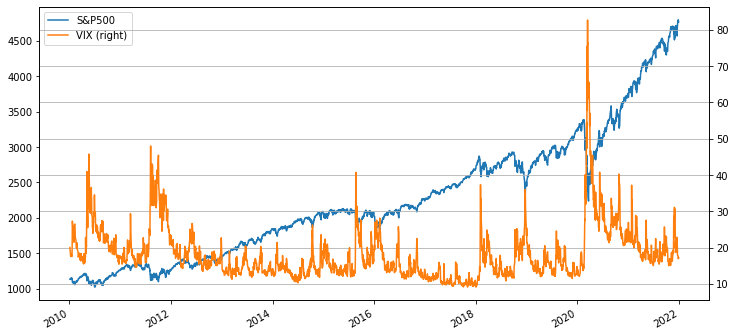

In [10]:
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

# NASDAQ 지수와 VIX 지수

<AxesSubplot:>

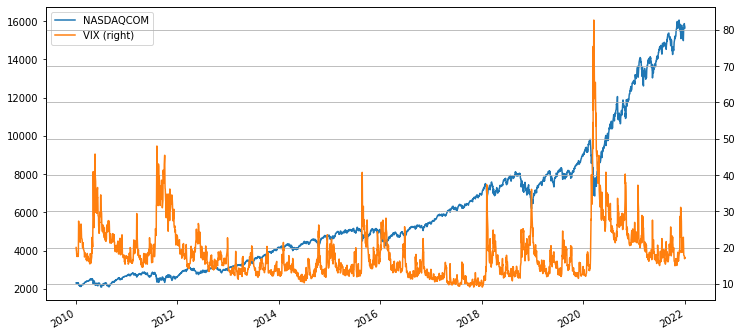

In [11]:
df[['NASDAQCOM', 'VIX']].plot(secondary_y='VIX')

# VIX 지수, S&P500 지수, NASDAQ 상관관계

In [12]:
df.corr()

,VIX,NASDAQCOM,S&P500
VIX,1.000000,0.060170,-0.026576
NASDAQCOM,0.060170,1.000000,0.988717
S&P500,-0.026576,0.988717,1.000000


먼저 VIX지수, S&P500 지수, 나스닥 지수의 상관관계를 구해보았습니다.

스탠더스 앤 푸어스에서 400개의 대형기업의 주식을 포함한 지수인 **S&P500 지수가 나스닥 지수와 0.9887 정도의 매우 높은 상관관계가 있다는 것**은 쉽게 예상할 수 있었습니다.

그러나, 시각화 결과에서 확인할 수 있듯이 나스닥이 오르면 떨어지고, 나스닥이 떨어지면 올랐던 **VIX 지수가 나스닥과의 상관관계가 매우 낮게 나온 것은 이상한 결과**입니다.

과연 두 지수의 상관관계가 실제로 낮은 것인지, VIX 지수는 정규화된 형태이나, S&P500지수는 우상향으로 상승하는 지수인 바, 그로 인해 상관관계가 낮게 나왔을 것이라 예상하여, statsmodel.tsa 라이브러리에서 제공하는 Trend, Seasonal, Residual 분석을 통해 **VIX 지수의 주기성과 S&P500 지수의 주기성 간의 상관관계**를 구해보았습니다.

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/tmp/ipykernel_985009/746910560.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  nas_sea = seasonal_decompose(df['NASDAQCOM'], model = 'addictive', freq = 144)


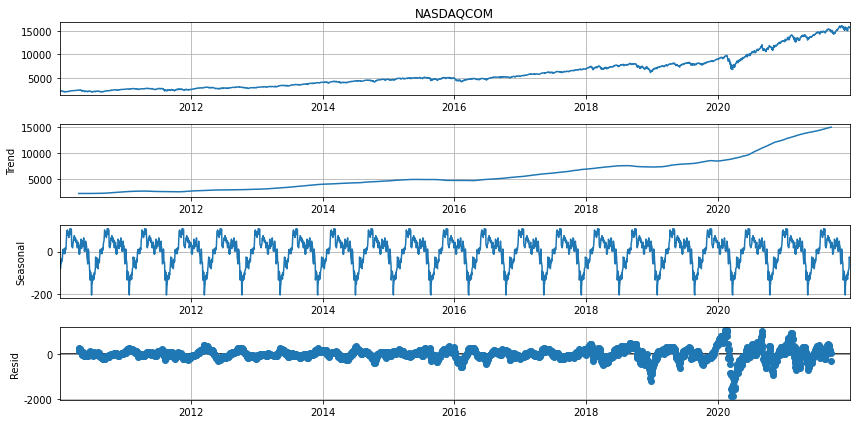

In [14]:
nas_sea = seasonal_decompose(df['NASDAQCOM'], model = 'addictive', freq = 144)
nas_sea.plot()
plt.show()

In [15]:
nas_sea.seasonal

2010-01-04   -42.542637
2010-01-05   -44.733789
2010-01-06   -57.413398
2010-01-07   -66.415617
2010-01-08   -80.997621
                ...    
2021-12-27   -80.704228
2021-12-28   -74.574226
2021-12-29   -25.701929
2021-12-30   -27.977965
2021-12-31   -30.328025
Name: seasonal, Length: 3021, dtype: float64

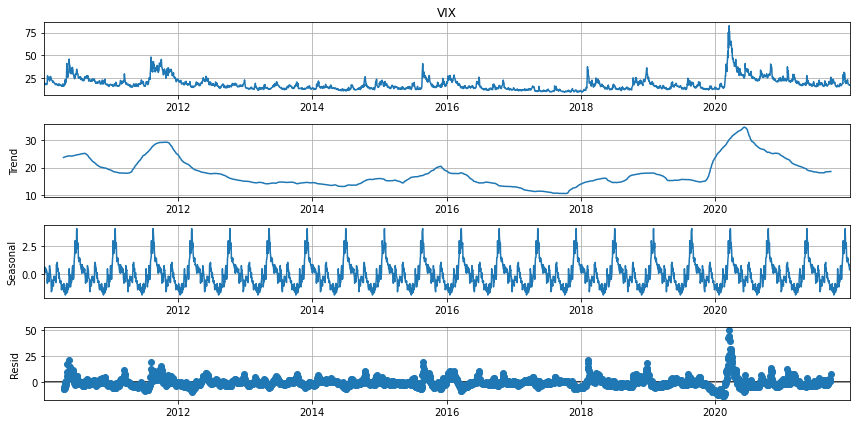

In [16]:
vix_sea = seasonal_decompose(df['VIX'], model = 'addictive', period = 144)
vix_sea.plot()
plt.show()

In [17]:
vix_sea.seasonal

2010-01-04    0.253111
2010-01-05    0.316514
2010-01-06    0.366285
2010-01-07    0.609524
2010-01-08    0.614335
                ...   
2021-12-27    0.800137
2021-12-28    0.856349
2021-12-29    0.619111
2021-12-30    0.464261
2021-12-31    0.377702
Name: seasonal, Length: 3021, dtype: float64

In [18]:
df['VIX_season'] = vix_sea.seasonal
df

,VIX,NASDAQCOM,S&P500,VIX_season
2010-01-04,20.04,2308.42,1132.99,0.253111
2010-01-05,19.35,2308.71,1136.52,0.316514
2010-01-06,19.16,2301.09,1137.14,0.366285
2010-01-07,19.06,2300.05,1141.69,0.609524
2010-01-08,18.13,2317.17,1144.98,0.614335
...,...,...,...,...
2021-12-27,17.68,15871.26,4791.19,0.800137
2021-12-28,17.54,15781.72,4786.36,0.856349
2021-12-29,16.95,15766.22,4793.06,0.619111
2021-12-30,17.33,15741.56,4778.73,0.464261


In [19]:
df['S&P_season'] = nas_sea.seasonal
df

,VIX,NASDAQCOM,S&P500,VIX_season,S&P_season
2010-01-04,20.04,2308.42,1132.99,0.253111,-42.542637
2010-01-05,19.35,2308.71,1136.52,0.316514,-44.733789
2010-01-06,19.16,2301.09,1137.14,0.366285,-57.413398
2010-01-07,19.06,2300.05,1141.69,0.609524,-66.415617
2010-01-08,18.13,2317.17,1144.98,0.614335,-80.997621
...,...,...,...,...,...
2021-12-27,17.68,15871.26,4791.19,0.800137,-80.704228
2021-12-28,17.54,15781.72,4786.36,0.856349,-74.574226
2021-12-29,16.95,15766.22,4793.06,0.619111,-25.701929
2021-12-30,17.33,15741.56,4778.73,0.464261,-27.977965


In [20]:
df[['VIX_season','S&P_season']].corr()

,VIX_season,S&P_season
VIX_season,1.000000,-0.823814
S&P_season,-0.823814,1.000000


결과는 위와 같았습니다.

예상대로 VIX 지수의 계절성과 S&P500지수의 계절성은 -0.8238 정도로 매우 높은 음의 상관관계를 지니고 있음을 확인할 수 있었습니다.

즉 VIX 지수에 베팅한다는 것은 주식 시장의 하락에 베팅한다는 의미가 됩니다.

VIX 지수에 관련하여 투자 가능한 종목들의 수익률을 어땠을까요?

### 미국 ETF

- `VXX` : iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
- `VIXY`: ProShares VIX Short-Term Futures ETF (NYSE)
- `VIXM` : ProShares VIX Mid-Term Futures ETF (NYSE)
- `VIIX` : VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
- `VXZ` : iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
- `XVZ` : iPath S&P 500 Dynamic VIX ETN (NYSE)
- `EVIX` : VelocityShares 1X Long VSTOXX Futures ETN (NYSE)

<AxesSubplot:xlabel='Date'>

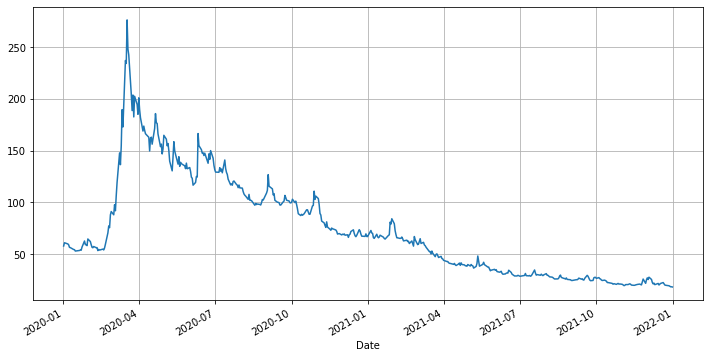

In [21]:
fdr.DataReader('VXX', '2020-01-01', '2021-12-31')['Close'].plot()

In [22]:
price_vxx = fdr.DataReader('VXX', '2020-01-01', '2021-12-31')['Close']
returns = price_vxx / price_vxx[0] - 1.0
returns[-1]

-0.680737422467264

<AxesSubplot:xlabel='Date'>

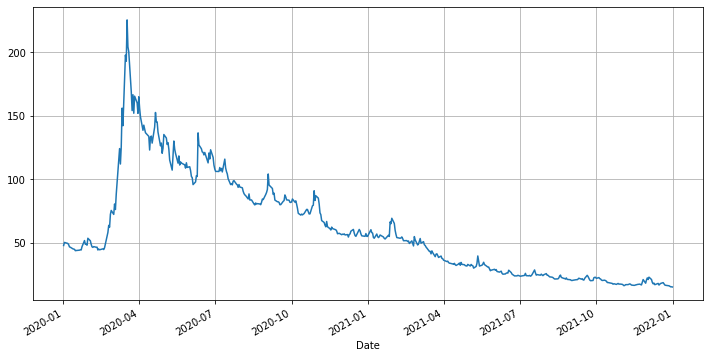

In [23]:
fdr.DataReader('VIXY', '2020-01-01', '2021-12-31')['Close'].plot()

In [24]:
price_vxy = fdr.DataReader('VIXY', '2020-01-01', '2021-12-31')['Close']
returns = price_vxy / price_vxy[0] - 1.0
returns[-1]

-0.6826359832635983

<AxesSubplot:xlabel='Date'>

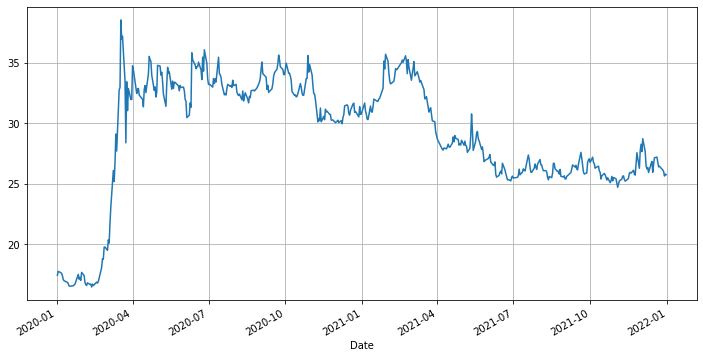

In [25]:
fdr.DataReader('VXZ', '2020-01-01', '2021-12-31')['Close'].plot()

In [26]:
price_vxz = fdr.DataReader('VXZ', '2020-01-01', '2021-12-31')['Close']
returns = price_vxz / price_vxz[0] - 1.0
returns[-1]

0.4778862722573234

VXX와 VIXY의 수익률은 -68퍼센트였으나,

VXZ의 수익률은 47퍼센트임을 확인할 수 있었습니다.

Short-term Base인 VXX와 달리 Mid-term Base인 VXZ의 수익률이 훨씬 좋았습니다.

# 인사이트

- VIX와 S&P500 지수의 계절성을 확인하였습니다.
- VIX 지수가 전반적으로 하락세를 보이고 있습니다. 투자에 대한 공포지수가 낮아지고 있다는 것이 경기에 어떤 영향을 줄 지 지켜보아야 합니다.

Reference:
[Finance Data.KR](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=b28bfb5f802f7ad5ad8012a59c32553225e40040&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46696e616e6365446174612f46696e616e6365446174615265616465722f623238626662356638303266376164356164383031326135396333323535333232356534303034302f7475746f7269616c2f46696e616e6365446174615265616465722532305475746f7269616c2532302d253230465245442532302545412542322542442545412542382542302532302545432538342541302545442539362538392532302545432541372538302545442539312539432e6970796e62&logged_in=true&nwo=FinanceData%2FFinanceDataReader&path=tutorial%2FFinanceDataReader+Tutorial+-+FRED+%EA%B2%BD%EA%B8%B0+%EC%84%A0%ED%96%89+%EC%A7%80%ED%91%9C.ipynb&platform=linux&repository_id=130222943&repository_type=Repository&version=97)